In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Define a function that creates a set of "n" random lat and lng combinations
def city_set(n):
    
    lats = np.random.uniform(lat_range[0], lat_range[1], size=n)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=n)
    return zip(lats, lngs)

In [3]:
# Request weather data (temperature, humidity, cloudiness, windspeed) from OpenWeather

attempted = []
cities = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("-----------------------------------")
print("Retrieving Data – Please be patient")
print("-----------------------------------")


while len(cities) < 500:
    
    sample = city_set(10)
    for coord in sample:
        
        city = citipy.nearest_city(coord[0], coord[1]).city_name
        
        if city in attempted:
            break
        
        elif city not in cities:
            
            # Avoid exceeding 60 calls per minute from API request
            time.sleep(1)
            
            # Request data from API
            city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
            response = requests.get(city_url).json()
            
            try:
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                temp.append(response["main"]["temp_max"])
                humidity.append(response["main"]["humidity"])
                cloudiness.append(response["clouds"]["all"])
                windspeed.append(response["wind"]["speed"])
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                cities.append(city)
                print(f"Found data for city #{len(cities)}: {city}")
                
            except:
                print(f"City '{city}' not found. Proceeding to next city.")
                pass
            
            attempted.append(city)
    
print("-------------------------------------------")
print(f"Successfully retrieved data for {len(cities)} cities.")
print("-------------------------------------------")

-----------------------------------
Retrieving Data – Please be patient
-----------------------------------
Found data for city #1: hithadhoo
Found data for city #2: esfarayen
Found data for city #3: ankazoabo
Found data for city #4: sompeta
City 'barentsburg' not found. Proceeding to next city.
Found data for city #5: ingham
Found data for city #6: rikitea
Found data for city #7: longyearbyen
Found data for city #8: haines junction
Found data for city #9: port lincoln
City 'tumannyy' not found. Proceeding to next city.
Found data for city #10: punta arenas
Found data for city #11: hobart
Found data for city #12: victoria
Found data for city #13: kahului
Found data for city #14: sao filipe
Found data for city #15: xingcheng
Found data for city #16: provideniya
Found data for city #17: bethel
Found data for city #18: vaini
Found data for city #19: pitimbu
Found data for city #20: kihei
Found data for city #21: glace bay
Found data for city #22: port elizabeth
Found data for city #23: po

Found data for city #203: port blair
Found data for city #204: abha
Found data for city #205: chapayevka
Found data for city #206: madang
Found data for city #207: los llanos de aridane
Found data for city #208: mehamn
Found data for city #209: flinders
Found data for city #210: dampit
Found data for city #211: sorong
City 'amderma' not found. Proceeding to next city.
Found data for city #212: fohnsdorf
Found data for city #213: wana
Found data for city #214: jibuti
Found data for city #215: fortuna
Found data for city #216: khartoum
Found data for city #217: margate
Found data for city #218: skibbereen
City 'kegayli' not found. Proceeding to next city.
Found data for city #219: rocha
City 'labutta' not found. Proceeding to next city.
Found data for city #220: chitrakonda
Found data for city #221: san quintin
Found data for city #222: ginir
Found data for city #223: mayumba
Found data for city #224: derzhavinsk
Found data for city #225: lagoa
Found data for city #226: hasaki
Found data

Found data for city #394: roald
Found data for city #395: lao cai
Found data for city #396: sidi ali
Found data for city #397: shache
Found data for city #398: tura
Found data for city #399: inongo
Found data for city #400: ajdabiya
Found data for city #401: santo antonio do taua
Found data for city #402: chernyshevskiy
Found data for city #403: mercedes
Found data for city #404: rzeszow
Found data for city #405: mabaruma
Found data for city #406: yabrud
Found data for city #407: chintamani
Found data for city #408: mana
Found data for city #409: jutai
Found data for city #410: turtas
City 'skagastrond' not found. Proceeding to next city.
Found data for city #411: perth
Found data for city #412: oussouye
Found data for city #413: hovd
Found data for city #414: kostomuksha
Found data for city #415: taoudenni
Found data for city #416: shubarkuduk
Found data for city #417: roma
Found data for city #418: caraballeda
Found data for city #419: isangel
Found data for city #420: tananger
Found

In [4]:
# Create a dataframe
weather_df = pd.DataFrame({
    "City":cities,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temperature (°F)":temp,
    "Humidity (%)":humidity,
    "Cloudiness (%)":cloudiness,
    "Wind Speed (mph)":windspeed,
    "Country Code":country,
    "Date & Time":date
})

# Extract average timestamp & store for later
mean_date = weather_df["Date & Time"].mean()
retrieval_date = datetime.datetime.fromtimestamp(mean_date).date()

# Export data into a csv
weather_df.to_csv(output_data_file,index = False)


weather_df.head()

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,hithadhoo,-0.6000,73.0833,82.56,79,82,11.03,MV,1612820584
1,esfarayen,37.0765,57.5101,37.40,93,0,2.30,IR,1612820717
2,ankazoabo,-22.2833,44.5167,72.95,89,100,3.80,MG,1612820718
3,sompeta,18.9333,84.6000,65.89,61,0,4.41,IN,1612820719
4,ingham,42.6000,-84.3833,18.00,62,90,2.98,US,1612820721


## Scatterplots

This scatterplot shows the relationship between Temperature and Latitude of each city.

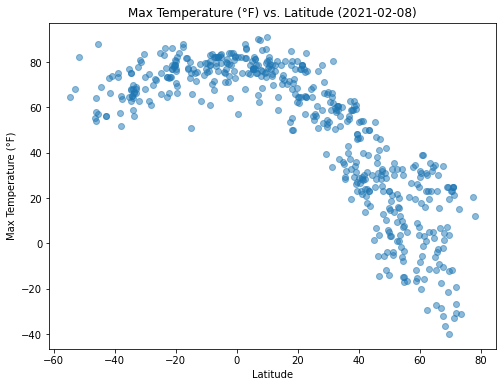

In [11]:
x_values = weather_df["Latitude"]
y_str = "Max Temperature (°F)"
y_values = weather_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5)
plt.title(f'{y_str} vs. Latitude ({retrieval_date})')
plt.xlabel("Latitude")
plt.ylabel(y_str)

plt.savefig("output_data/Temperature_vs_Latitude.png")
plt.show()

This scatterplot shows the relationship between Humidity and Latitude of each city.

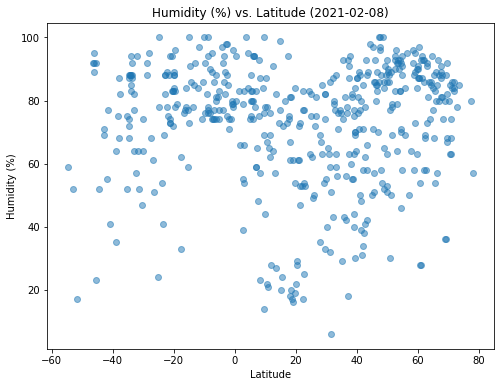

In [12]:
x_values = weather_df["Latitude"]
y_str = "Humidity (%)"
y_values = weather_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5)
plt.title(f'{y_str} vs. Latitude ({retrieval_date})')
plt.xlabel("Latitude")
plt.ylabel(y_str)

plt.savefig("output_data/Humidity_vs_Latitude.png")
plt.show()

This scatterplot shows the relationship between Cloudiness and Latitude of each city.

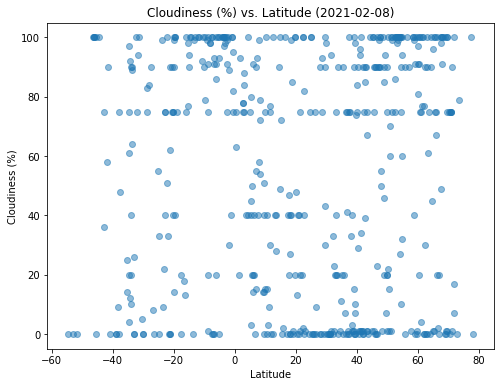

In [13]:
x_values = weather_df["Latitude"]
y_str = "Cloudiness (%)"
y_values = weather_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5)
plt.title(f'{y_str} vs. Latitude ({retrieval_date})')
plt.xlabel("Latitude")
plt.ylabel(y_str)

plt.savefig("output_data/Cloudiness_vs_Latitude.png")
plt.show()

This scatterplot shows the relationship between Wind Speed and Latitude of each city.

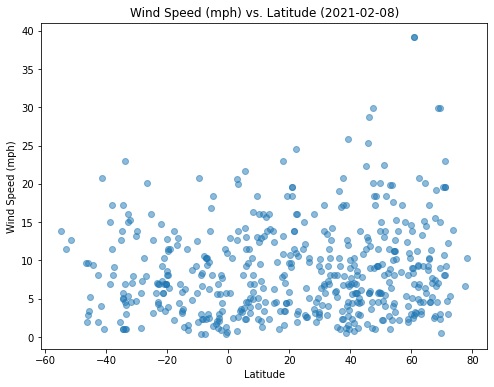

In [14]:
x_values = weather_df["Latitude"]
y_str = "Wind Speed (mph)"
y_values = weather_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5)
plt.title(f'{y_str} vs. Latitude ({retrieval_date})')
plt.xlabel("Latitude")
plt.ylabel(y_str)

plt.savefig("output_data/Wind_Speed_vs_Latitude.png")
plt.show()

## Linear Regression

To analyze each relationship using linear regression, we will separate the data by hemisphere (since we are exploring whether distance away from the equator, where latitude is zero, is correlated with the weather data).

In [15]:
# Create a DataFrame for each hemisphere

north_df = weather_df.loc[weather_df["Latitude"]>0]

south_df = weather_df.loc[weather_df["Latitude"]<0]

#### Northern Hemisphere: Temperature vs. Latitude

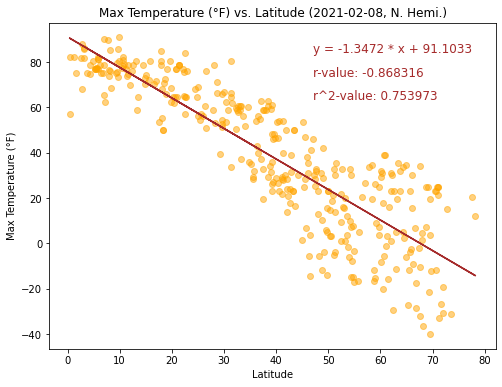

In [20]:
x_values = north_df["Latitude"]
y_str = "Max Temperature (°F)"
y_values = north_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5,c="orange")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, N. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="brown")

x = max(x_values)-.4*(max(x_values)-min(x_values))
y_range = (max(y_values)- min(y_values))
                      
plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="brown",size=12)

plt.savefig("output_data/Temperature_vs_Latitude_North.png")
plt.show()

#### Southern Hemisphere: Temperature vs. Latitude

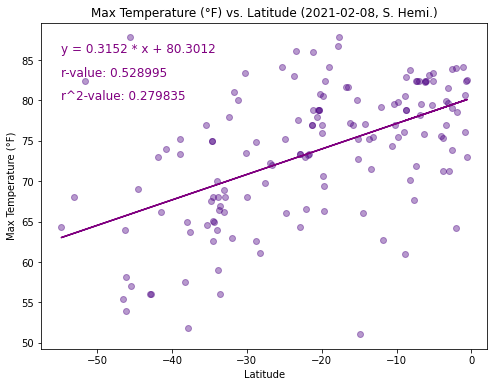

In [40]:
x_values = south_df["Latitude"]
y_str = "Max Temperature (°F)"
y_values = south_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.4,c="indigo")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, S. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="purple")

x = min(x_values)
y_range = (max(y_values)- min(y_values))

plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="purple",size=12)

plt.savefig("output_data/Temperature_vs_Latitude_South.png")
plt.show()

These scatterplots both have some level of medium to strong correlation (although it seems the North Hemisphere has a higher correlation), but clearly there are other factors than just latitude that influence temperature. A negative correlation in the Northern Hemisphere data would indicate that as latitude increases, temperature decreases. A positive correlation in the Southern Hemisphere data would indicate that as latitude increases, temperature also increases. We also know that the Earth's axis is tilted, so if we ran these results from a different season we may see these correlations get stronger/weaker in one hemisphere or the other (perhaps, inversely).

#### Northen Hemisphere: Humidity vs. Latitude

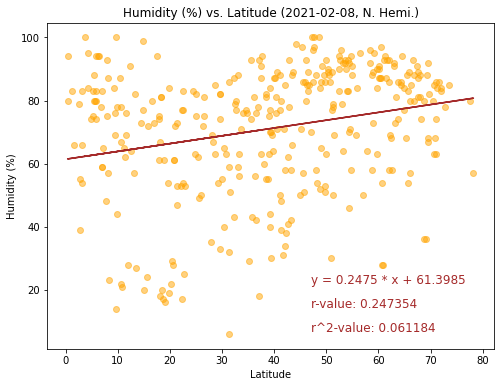

In [33]:
x_values = north_df["Latitude"]
y_str = "Humidity (%)"
y_values = north_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5,c="orange")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, N. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="brown")

x = max(x_values)-.4*(max(x_values)-min(x_values))
y_range = (max(y_values)- min(y_values))
                      
plt.text(x,min(y_values)+y_range*.17,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="brown",size=12)
plt.text(x,min(y_values)+y_range*.09,f"r-value: {round(rvalue,6)}",c="brown",size=12)
plt.text(x,min(y_values)+y_range*.01,f"r^2-value: {round(rvalue**2,6)}",c="brown",size=12)

plt.savefig("output_data/Humidity_vs_Latitude_North.png")
plt.show()

#### Southern Hemisphere: Humidity vs. Latitude

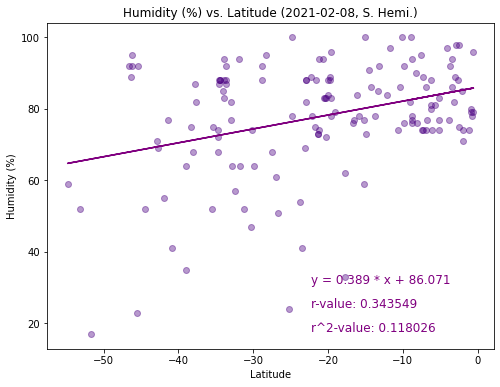

In [39]:
x_values = south_df["Latitude"]
y_str = "Humidity (%)"
y_values = south_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.4,c="indigo")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, S. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="purple")

x = max(x_values)-.4*(max(x_values)-min(x_values))
y_range = (max(y_values)- min(y_values))

plt.text(x,min(y_values)+y_range*.17,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="purple",size=12)
plt.text(x,min(y_values)+y_range*.09,f"r-value: {round(rvalue,6)}",c="purple",size=12)
plt.text(x,min(y_values)+y_range*.01,f"r^2-value: {round(rvalue**2,6)}",c="purple",size=12)

plt.savefig("output_data/Humidity_vs_Latitude_South.png")
plt.show()

While these graphs may show very weak correlations, they are too weak to draw many conclusions from. It would appear that humidity depends on either a variety of factors, or simply not latitude.

#### Northern Hemisphere: Cloudiness vs. Latitude

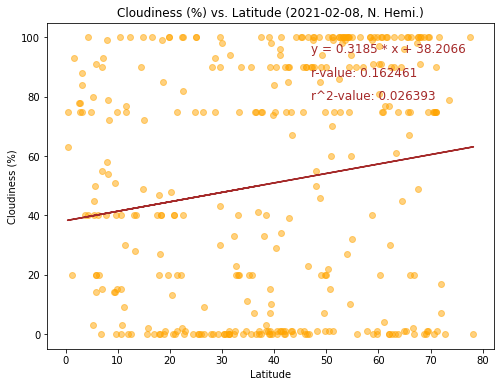

In [41]:
x_values = north_df["Latitude"]
y_str = "Cloudiness (%)"
y_values = north_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5,c="orange")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, N. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="brown")

x = max(x_values)-.4*(max(x_values)-min(x_values))
y_range = (max(y_values)- min(y_values))
                      
plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="brown",size=12)

plt.savefig("output_data/Cloudiness_vs_Latitude_North.png")
plt.show()

#### Southern Hemisphere: Cloudiness vs. Latitude

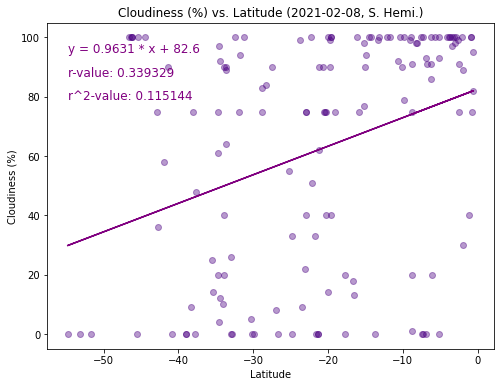

In [42]:
x_values = south_df["Latitude"]
y_str = "Cloudiness (%)"
y_values = south_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.4,c="indigo")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, S. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="purple")

x = min(x_values)
y_range = (max(y_values)- min(y_values))

plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="purple",size=12)

plt.savefig("output_data/Cloudiness_vs_Latitude_South.png")
plt.show()

These graphs also show very weak correlations between cloudiness and latitude, and we may not conclude that latitude has any impact on cloudiness that we can determine.

#### Northern Hemisphere: Wind Speed vs. Latitude

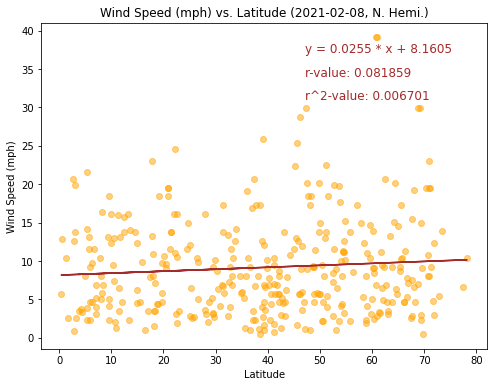

In [43]:
x_values = north_df["Latitude"]
y_str = "Wind Speed (mph)"
y_values = north_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.5,c="orange")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, N. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="brown")

x = max(x_values)-.4*(max(x_values)-min(x_values))
y_range = (max(y_values)- min(y_values))
                      
plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="brown",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="brown",size=12)

plt.savefig("output_data/Wind_Speed_vs_Latitude_North.png")
plt.show()

#### Southern Hemisphere: Wind Speed vs. Latitude

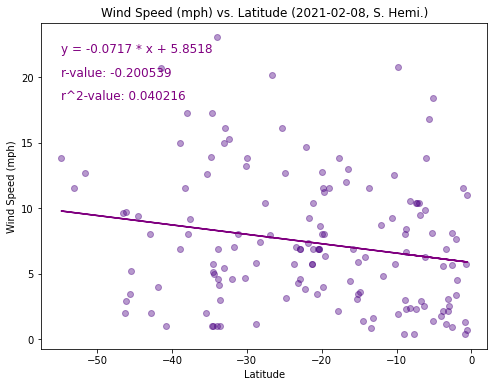

In [44]:
x_values = south_df["Latitude"]
y_str = "Wind Speed (mph)"
y_values = south_df[y_str]

plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values,alpha=0.4,c="indigo")
plt.title(f'{y_str} vs. Latitude ({retrieval_date}, S. Hemi.)')
plt.xlabel("Latitude")
plt.ylabel(y_str)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values,color="purple")

x = min(x_values)
y_range = (max(y_values)- min(y_values))

plt.text(x,max(y_values)-y_range*.05,f"y = {round(slope,4)} * x + {round(intercept,4)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.13,f"r-value: {round(rvalue,6)}",c="purple",size=12)
plt.text(x,max(y_values)-y_range*.21,f"r^2-value: {round(rvalue**2,6)}",c="purple",size=12)

plt.savefig("output_data/Wind_Speed_vs_Latitude_South.png")
plt.show()

These charts may have the weakest correlation of all, indicating no relevant relationship between latitude and wind speed according to our sample data.